# Project - Predictive Modelling

## Import Libraries

1. General libraries to work with data and visualize data:

In [2]:
import numpy as np
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2. sklearn libraries to perform regression and classifications:

In [3]:
# For randomized data splitting
from sklearn.model_selection import train_test_split

# 1. To build linear regression_model & Stats Model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

3. To check model performance:

In [4]:
from sklearn import metrics

# calculate accuracy measures and confusion matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1 Linear Regresison

## 1.1 Load dataset and explore

Read the data and do exploratory data analysis. Describe the data briefly. (Check the Data types, shape, EDA, 5 point summary). Perform Univariate, Bivariate Analysis, Multivariate Analysis.

In [5]:
df= pd.read_excel('compactiv.xlsx')
df.head()

lread  lwrite  scall  sread  swrite  fork  exec    rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2  40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2    448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4      NaN  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2      NaN   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4      NaN  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt         runqsz  freemem  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40      CPU_Bound     4670   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  Not_CPU_Bound     7278   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20  Not_CPU_Bound      702   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  Not_CPU_Bound     7248   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60  Not_CPU_Bound      633   

  freeswap  usr  
0  1730946   95  
1  1869002   97  
2  1021237   87  
3  1863704   98  
4  1760253   90  

[5 rows x 22 columns]

In [6]:
df.shape

(8192, 22)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8088 non-null   float64
 8   wchar     8177 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

Most of the columns in the data are numeric in nature ('int64' or 'float64' type).
'runqsz' is object type.

Fix which columns can be dropped
Fix which columns are corelated

In [8]:
df.describe().T

count          mean            std     min        25%        50%  \
lread     8192.0  1.955969e+01      53.353799     0.0        2.0        7.0   
lwrite    8192.0  1.310620e+01      29.891726     0.0        0.0        1.0   
scall     8192.0  2.306318e+03    1633.617322   109.0     1012.0     2051.5   
sread     8192.0  2.104800e+02     198.980146     6.0       86.0      166.0   
swrite    8192.0  1.500582e+02     160.478980     7.0       63.0      117.0   
fork      8192.0  1.884554e+00       2.479493     0.0        0.4        0.8   
exec      8192.0  2.791998e+00       5.212456     0.0        0.2        1.2   
rchar     8088.0  1.973857e+05  239837.493526   278.0    34091.5   125473.5   
wchar     8177.0  9.590299e+04  140841.707911  1498.0    22916.0    46619.0   
pgout     8192.0  2.285317e+00       5.307038     0.0        0.0        0.0   
ppgout    8192.0  5.977229e+00      15.214590     0.0        0.0        0.0   
pgfree    8192.0  1.191971e+01      32.363520     0.0        0.0        0.0   
pgscan    8192.0  2.152685e+01      71.141340     0.0        0.0        0.0   
atch      8192.0  1.127505e+00       5.708347     0.0        0.0        0.0   
pgin      8192.0  8.277960e+00      13.874978     0.0        0.6        2.8   
ppgin     8192.0  1.238859e+01      22.281318     0.0        0.6        3.8   
pflt      8192.0  1.097938e+02     114.419221     0.0       25.0       63.8   
vflt      8192.0  1.853158e+02     191.000603     0.2       45.4      120.4   
freemem   8192.0  1.763456e+03    2482.104511    55.0      231.0      579.0   
freeswap  8192.0  1.328126e+06  422019.426957     2.0  1042623.5  1289289.5   
usr       8192.0  8.396887e+01      18.401905     0.0       81.0       89.0   

                  75%         max  
lread          20.000     1845.00  
lwrite         10.000      575.00  
scall        3317.250    12493.00  
sread         279.000     5318.00  
swrite        185.000     5456.00  
fork            2.200       20.12  
exec            2.800       59.56  
rchar      267828.750  2526649.00  
wchar      106101.000  1801623.00  
pgout           2.400       81.44  
ppgout          4.200      184.20  
pgfree          5.000      523.00  
pgscan          0.000     1237.00  
atch            0.600      211.58  
pgin            9.765      141.20  
ppgin          13.800      292.61  
pflt          159.600      899.80  
vflt          251.800     1365.00  
freemem      2002.250    12027.00  
freeswap  1730379.500  2243187.00  
usr            94.000       99.00

### Univariate Analysis

<AxesSubplot:xlabel='lread', ylabel='Count'>

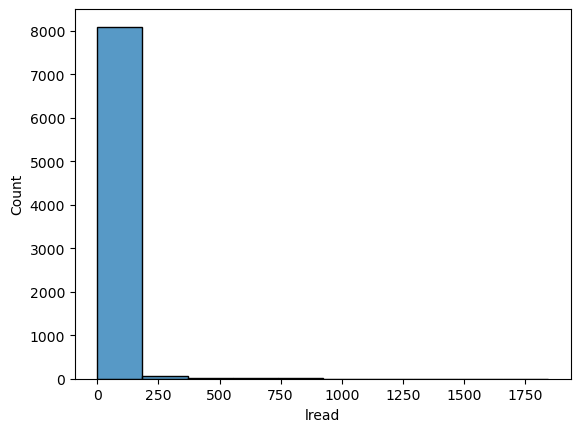

In [9]:
sns.histplot(df.lread,bins=10)

<AxesSubplot:xlabel='freeswap', ylabel='Count'>

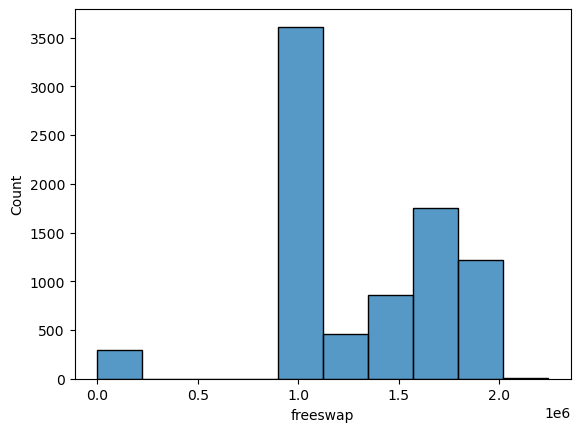

In [10]:
sns.histplot(df.freeswap,bins=10)

### Bivariate Analysis

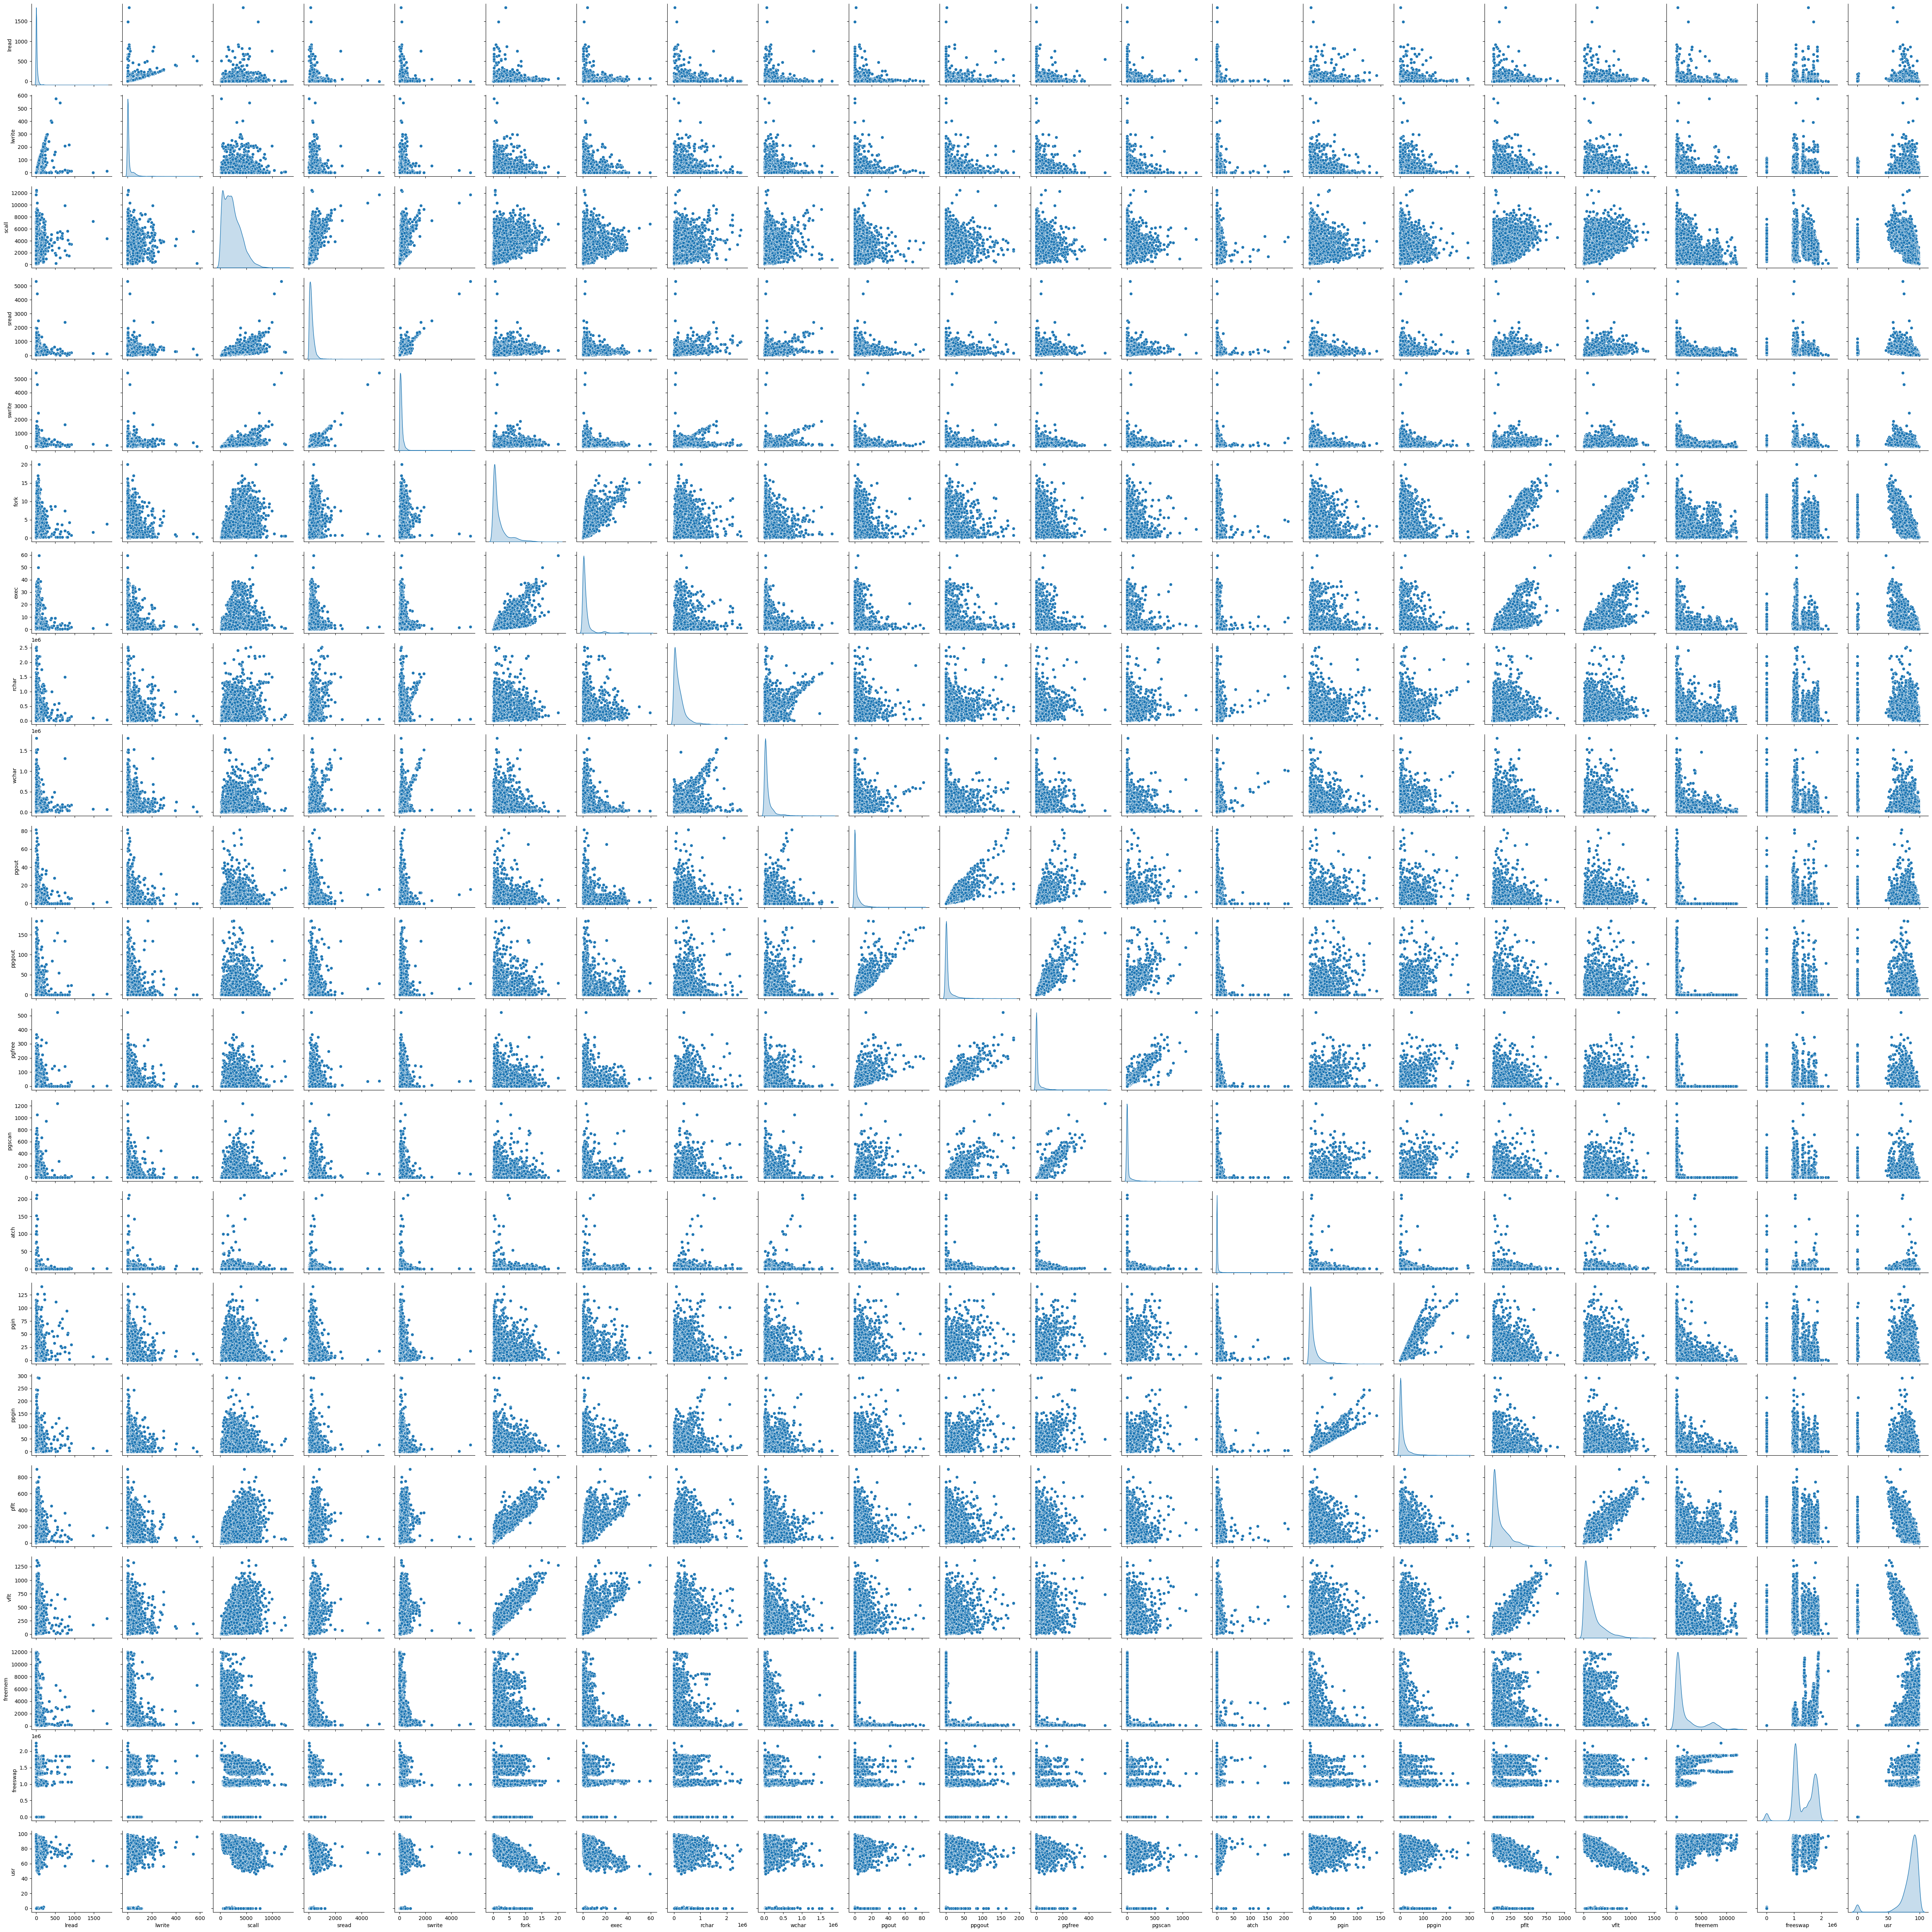

In [11]:
#Fix plot size

df = df.iloc[:, 0:23]
sns.pairplot(df, diag_kind='kde');

### Multivariate Analysis

<AxesSubplot:xlabel='usr', ylabel='count'>

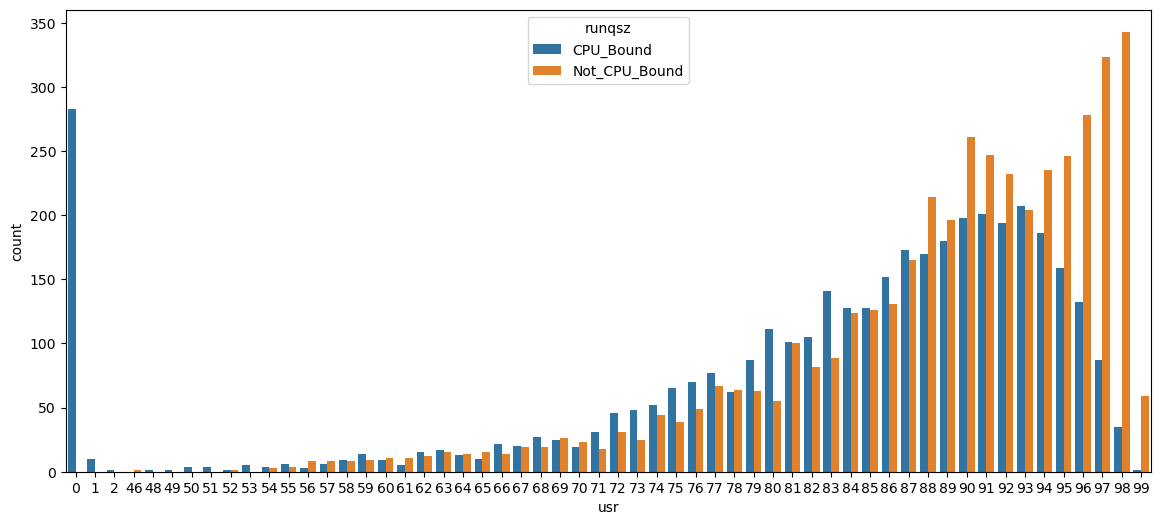

In [12]:
fig, ax = plt.subplots(figsize=(14,6)) 
sns.countplot(data=df, x="usr", hue="runqsz", ax=ax)  

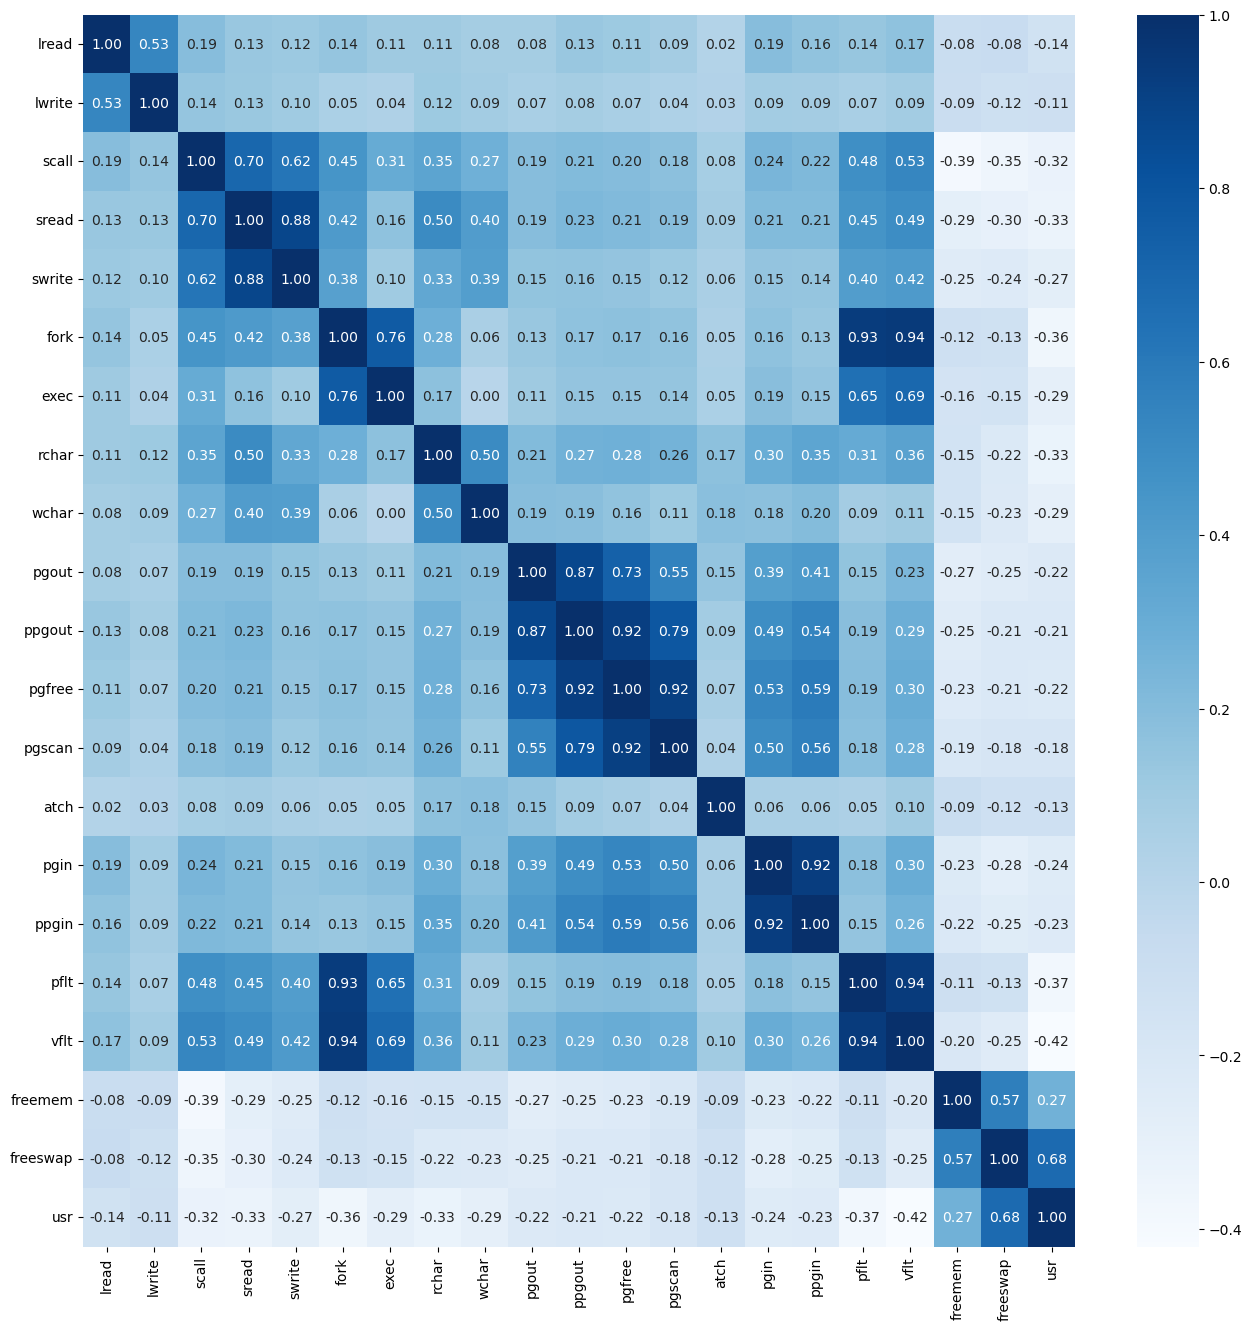

In [13]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

There is a lot of co-relation between the variables and multi co-linearity. This shall be removed

## 1.2 Missing Values & Outliers

Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of creating new features if required. Also check for outliers and duplicates if there.

In [14]:
df.duplicated().sum()

0

There are no duplicates in the data

### Missing Values

In [15]:
df.isnull().sum()

lread         0
lwrite        0
scall         0
sread         0
swrite        0
fork          0
exec          0
rchar       104
wchar        15
pgout         0
ppgout        0
pgfree        0
pgscan        0
atch          0
pgin          0
ppgin         0
pflt          0
vflt          0
runqsz        0
freemem       0
freeswap      0
usr           0
dtype: int64

There are 104 null/missing values in ‘rchar’ column, 15 in ‘wchar’ column respectively. Boxplots are generated to visualize the skewness in data.

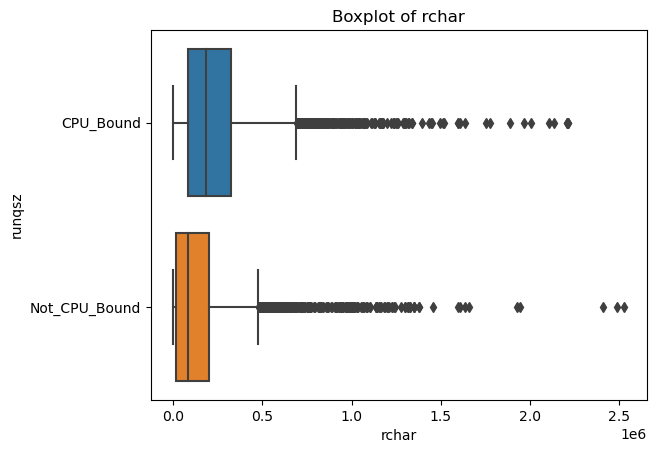

In [16]:
sns.boxplot(x= 'rchar', y='runqsz', data=df)
plt.title('Boxplot of rchar')
plt.show()

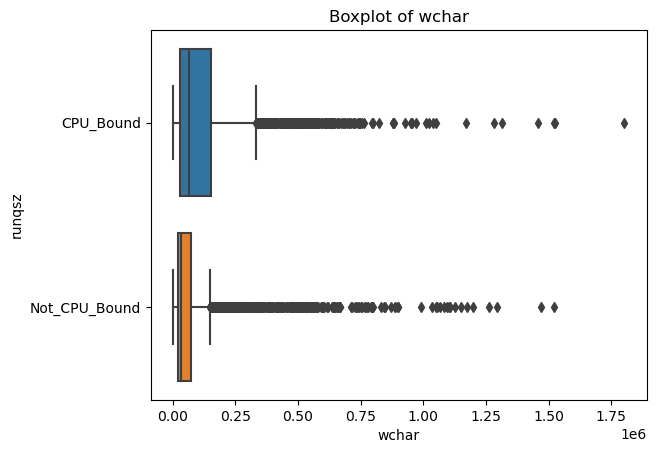

In [17]:
sns.boxplot(x= 'wchar', y='runqsz', data=df)
plt.title('Boxplot of wchar')
plt.show()

Median imputation is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.

In [18]:
medianfiller_rchar=df['rchar'].median()
medianfiller_rchar

125473.5

In [19]:
medianfiller_wchar=df['wchar'].median()
medianfiller_wchar

46619.0

In [20]:
df['rchar']=df['rchar'].fillna(medianfiller_rchar)
df['wchar']=df['wchar'].fillna(medianfiller_wchar)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lread     8192 non-null   int64  
 1   lwrite    8192 non-null   int64  
 2   scall     8192 non-null   int64  
 3   sread     8192 non-null   int64  
 4   swrite    8192 non-null   int64  
 5   fork      8192 non-null   float64
 6   exec      8192 non-null   float64
 7   rchar     8192 non-null   float64
 8   wchar     8192 non-null   float64
 9   pgout     8192 non-null   float64
 10  ppgout    8192 non-null   float64
 11  pgfree    8192 non-null   float64
 12  pgscan    8192 non-null   float64
 13  atch      8192 non-null   float64
 14  pgin      8192 non-null   float64
 15  ppgin     8192 non-null   float64
 16  pflt      8192 non-null   float64
 17  vflt      8192 non-null   float64
 18  runqsz    8192 non-null   object 
 19  freemem   8192 non-null   int64  
 20  freeswap  8192 non-null   int6

There are no more missing values. However for '0' values.

### 1.3.1 Encode Data

In [22]:
df['runqsz'].value_counts()

Not_CPU_Bound    4331
CPU_Bound        3861
Name: runqsz, dtype: int64

In [23]:
df = pd.get_dummies(df, columns=['runqsz'],drop_first=True)
df.head()

lread  lwrite  scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0      1       0   2147     79      68   0.2   0.2   40671.0  53995.0    0.0   
1      0       0    170     18      21   0.2   0.2     448.0   8385.0    0.0   
2     15       3   2162    159     119   2.0   2.4  125473.5  31950.0    0.0   
3      0       0    160     12      16   0.2   0.2  125473.5   8670.0    0.0   
4      5       1    330     39      38   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt  freemem  freeswap  usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40     4670   1730946   95   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83     7278   1869002   97   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20      702   1021237   87   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80     7248   1863704   98   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60      633   1760253   90   

   runqsz_Not_CPU_Bound  
0                     0  
1                     1  
2                     1  
3                     1  
4                     1  

[5 rows x 22 columns]

### Outliers

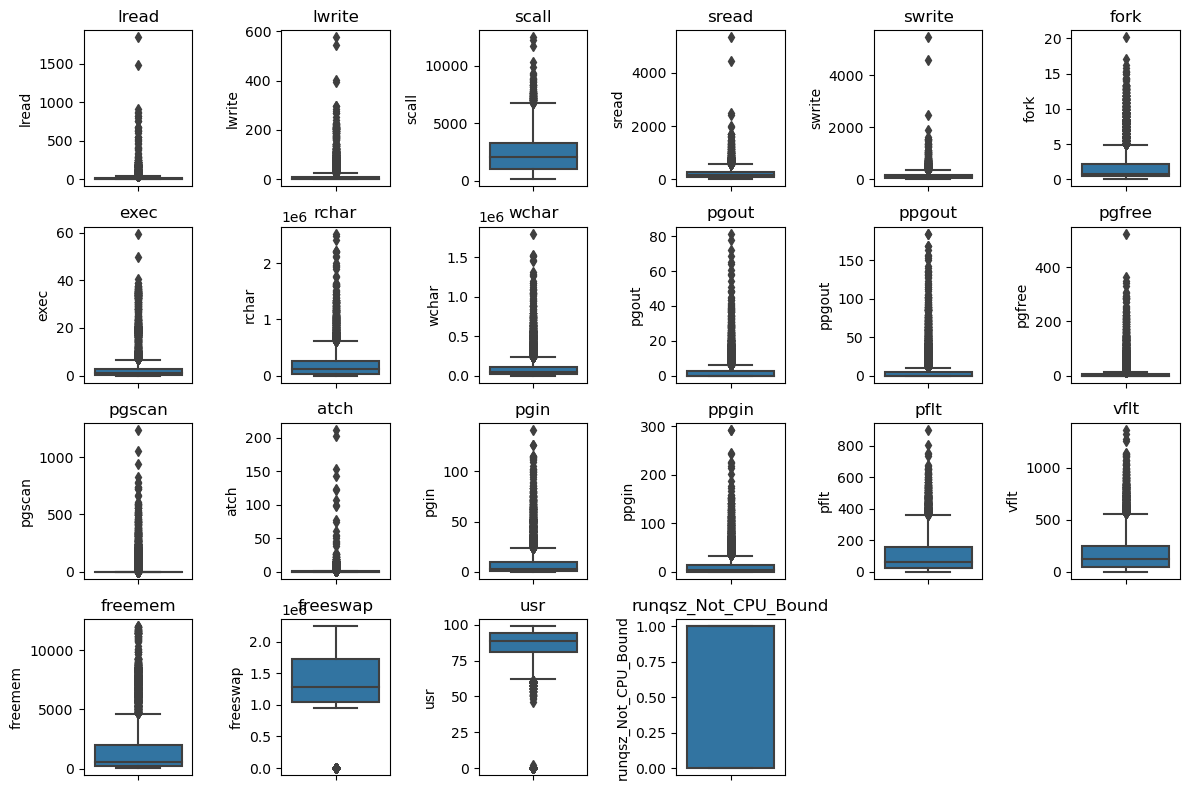

In [24]:
plt.figure(figsize = (12,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(4,6, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title(feature_list[i])
    plt.tight_layout()

There are multiple outliers in multiple columns.

In [25]:
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25, 0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [26]:
for i in df.columns:
    LL,UL=remove_outlier(df[i])
    df[i] = np.where(df[i] > UL, UL, df[i])
    df[i] = np.where(df[i] < LL, LL, df[i])

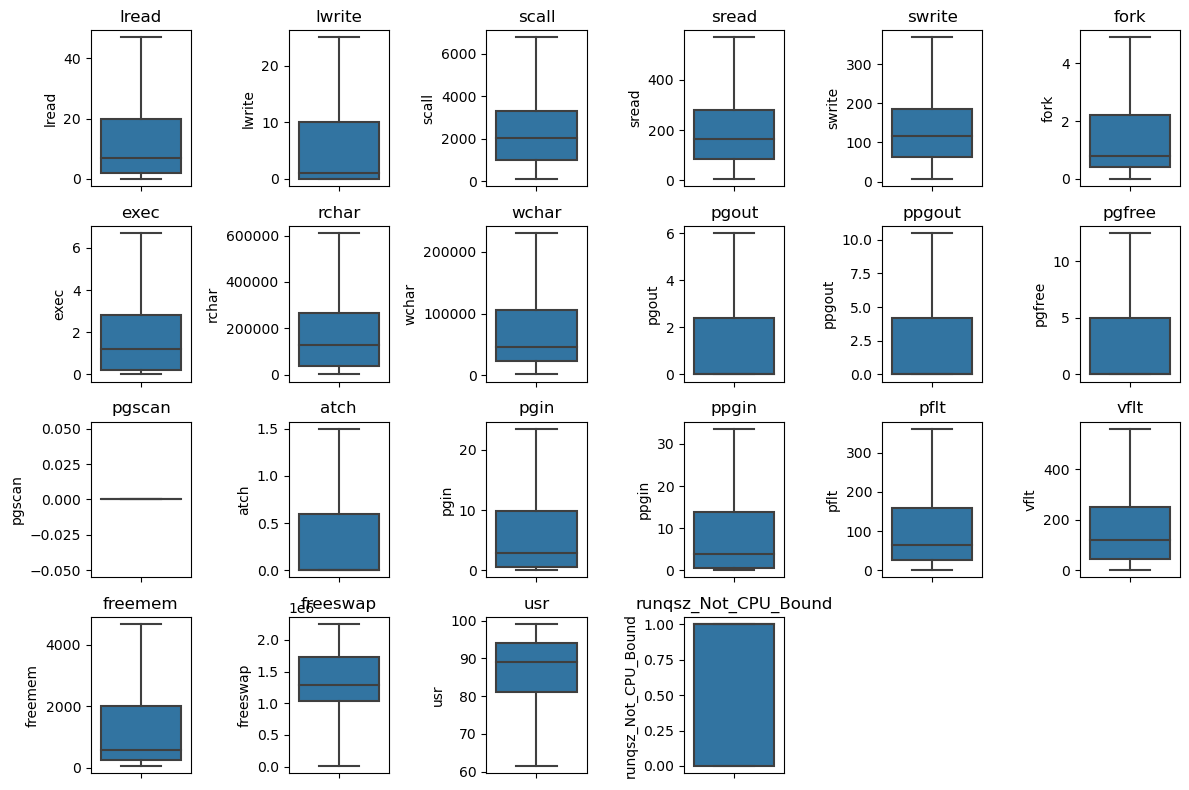

In [27]:
plt.figure(figsize = (12,8))
feature_list = df.columns
for i in range(len(feature_list)):
    plt.subplot(4,6, i + 1)
    sns.boxplot(y = df[feature_list[i]], data = df)
    plt.title(feature_list[i])
    plt.tight_layout()

In [28]:
df.head(5)

lread  lwrite   scall  sread  swrite  fork  exec     rchar    wchar  pgout  \
0    1.0     0.0  2147.0   79.0    68.0   0.2   0.2   40671.0  53995.0    0.0   
1    0.0     0.0   170.0   18.0    21.0   0.2   0.2     448.0   8385.0    0.0   
2   15.0     3.0  2162.0  159.0   119.0   2.0   2.4  125473.5  31950.0    0.0   
3    0.0     0.0   160.0   12.0    16.0   0.2   0.2  125473.5   8670.0    0.0   
4    5.0     1.0   330.0   39.0    38.0   0.4   0.4  125473.5  12185.0    0.0   

   ...  pgscan  atch  pgin  ppgin    pflt    vflt   freemem   freeswap   usr  \
0  ...     0.0   0.0   1.6    2.6   16.00   26.40  4659.125  1730946.0  95.0   
1  ...     0.0   0.0   0.0    0.0   15.63   16.83  4659.125  1869002.0  97.0   
2  ...     0.0   1.2   6.0    9.4  150.20  220.20   702.000  1021237.0  87.0   
3  ...     0.0   0.0   0.2    0.2   15.60   16.80  4659.125  1863704.0  98.0   
4  ...     0.0   0.0   1.0    1.2   37.80   47.60   633.000  1760253.0  90.0   

   runqsz_Not_CPU_Bound  
0                   0.0  
1                   1.0  
2                   1.0  
3                   1.0  
4                   1.0  

[5 rows x 22 columns]

In [29]:
df['pgscan'].value_counts()

0.0    8192
Name: pgscan, dtype: int64

In [30]:
df['pgout'].value_counts()

0.00    4878
6.00    1016
0.20     140
0.40     140
0.60     135
        ... 
2.97       1
5.61       1
5.98       1
2.34       1
3.58       1
Name: pgout, Length: 93, dtype: int64

In [31]:
df.drop(['pgscan'], inplace=True, axis=1)

In [32]:
df.shape

(8192, 21)

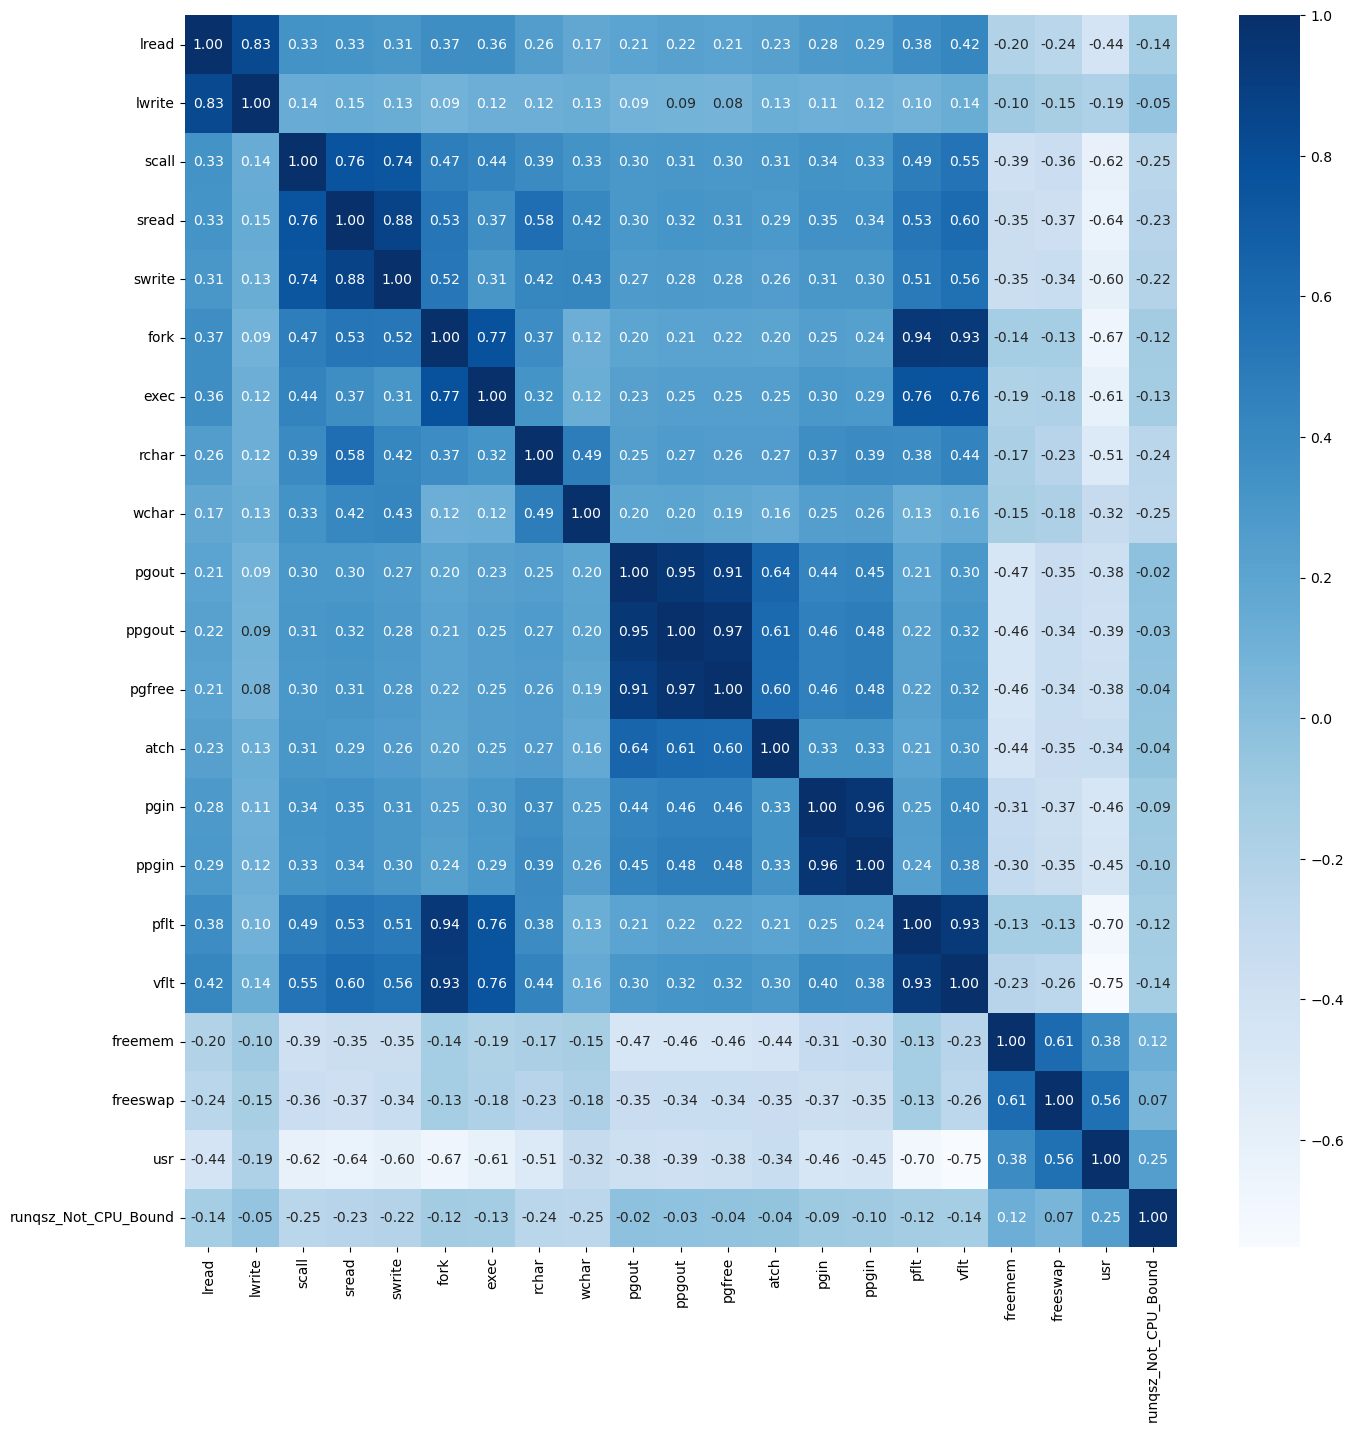

In [33]:
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.show()

There is still a lot of co-relation between the variables and multi co-linearity. This shall be removed

## 1.3 Modeling

Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

Fix scikit learn method is used?

### 1.3.2 Split Data for Stats & Linear Models

In [35]:
# independent variables
X = df.drop(['usr'], axis=1)
# dependent variable
y = df[['usr']]

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.30,
                                                    random_state=1)

Stats Model:

### Check Multi-collinearity using VIF:

In [37]:
# Compute VIF for each predictor to detect multicollinearity
vif = pd.DataFrame()
vif['feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif.sort_values('VIF')

feature        VIF
19  runqsz_Not_CPU_Bound   2.155770
12                  atch   2.735390
8                  wchar   3.341629
17               freemem   3.406296
7                  rchar   4.345751
6                   exec   6.092824
1                 lwrite   6.548895
18              freeswap   7.112881
2                  scall   8.826652
0                  lread   9.505097
9                  pgout  16.004553
4                 swrite  16.779288
3                  sread  18.181101
11                pgfree  22.973384
13                  pgin  23.072154
14                 ppgin  23.163752
15                  pflt  24.685414
5                   fork  25.002626
16                  vflt  33.875742
10                ppgout  40.798798

In [38]:
# Drop features with VIF scores greater than 10
to_drop = vif[vif["VIF"] > 7]["feature"].values
X_train = X_train.drop(to_drop, axis=1)
X_test = X_test.drop(to_drop, axis=1)

In [39]:
# Add constant to X_train and X_test
X_trainc = sm.add_constant(X_train)
X_testc = sm.add_constant(X_test)

In [40]:
X_trainc.head()

const  lwrite  exec     rchar       wchar  atch  freemem  \
694     1.0     1.0   0.6  198703.0  230625.875   1.5    121.0   
5535    1.0     1.0   0.2    7163.0   24842.000   0.0   1476.0   
4244    1.0    25.0   0.4   83246.0   53705.000   1.5     82.0   
2472    1.0     8.0   3.0   96009.0   70467.000   0.0    772.0   
7052    1.0    23.0   1.6   17132.0   12514.000   0.0   4179.0   

      runqsz_Not_CPU_Bound  
694                    0.0  
5535                   1.0  
4244                   0.0  
2472                   0.0  
7052                   1.0

In [41]:
X_testc.head()

const  lwrite  exec     rchar       wchar  atch   freemem  \
3894    1.0    25.0   0.2   26592.0   54394.000   0.0  4659.125   
4276    1.0     0.0   0.4   16667.0   36431.000   0.0  2979.000   
3414    1.0     7.0   0.4   14513.0   61905.000   1.5    89.000   
4165    1.0     4.0   5.6  337517.0   94832.000   1.4  1300.000   
7385    1.0     3.0   1.4   73537.0  230625.875   0.0  2114.000   

      runqsz_Not_CPU_Bound  
3894                   1.0  
4276                   1.0  
3414                   0.0  
4165                   0.0  
7385                   0.0

Linear Model:

In [42]:
X_train.head()

lwrite  exec     rchar       wchar  atch  freemem  runqsz_Not_CPU_Bound
694      1.0   0.6  198703.0  230625.875   1.5    121.0                   0.0
5535     1.0   0.2    7163.0   24842.000   0.0   1476.0                   1.0
4244    25.0   0.4   83246.0   53705.000   1.5     82.0                   0.0
2472     8.0   3.0   96009.0   70467.000   0.0    772.0                   0.0
7052    23.0   1.6   17132.0   12514.000   0.0   4179.0                   1.0

In [43]:
X_test.head()

lwrite  exec     rchar       wchar  atch   freemem  runqsz_Not_CPU_Bound
3894    25.0   0.2   26592.0   54394.000   0.0  4659.125                   1.0
4276     0.0   0.4   16667.0   36431.000   0.0  2979.000                   1.0
3414     7.0   0.4   14513.0   61905.000   1.5    89.000                   0.0
4165     4.0   5.6  337517.0   94832.000   1.4  1300.000                   0.0
7385     3.0   1.4   73537.0  230625.875   0.0  2114.000                   0.0

### 1.3.3 Fit Stats linear model using OLS

In [44]:
ols_model = sm.OLS(y_train, X_trainc)
ols_results = ols_model.fit()

In [45]:
# let's print the regression summary
# print the summary statistics for the training set

print("Training set:")
print(ols_results.summary())

Training set:
                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     1100.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        08:49:24   Log-Likelihood:                -18773.
No. Observations:                5734   AIC:                         3.756e+04
Df Residuals:                    5726   BIC:                         3.762e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const             

In [46]:
# make a prediction for the testing set
ytest_predict_stats = ols_results.predict(X_testc)
print("Predicted y:", ytest_predict_stats)

Predicted y: 3894    96.087940
4276    95.871961
3414    88.709620
4165    74.082082
7385    88.303152
          ...    
4744    98.128416
6918    84.670796
1556    92.183017
1577    79.612353
453     83.089417
Length: 2458, dtype: float64


In [47]:
# calculate the RMSE and R-squared for the training set
train_rmse = np.sqrt(mean_squared_error(y_train, ols_results.predict(X_trainc)))
train_r_squared = ols_results.rsquared
print("Training set RMSE:", train_rmse)
print("Training set R-squared:", train_r_squared)

# calculate the RMSE and R-squared for the testing set
test_rmse = np.sqrt(mean_squared_error(y_test, ytest_predict_stats))
test_r_squared = 1 - (np.sum((y_test - ytest_predict_stats)**2) / np.sum((y_test - np.mean(y_test))**2))
print("Testing set RMSE:", test_rmse)
print("Testing set R-squared:", test_r_squared)

Training set RMSE: 6.39219241345331
Training set R-squared: 0.5734743091915266
Testing set RMSE: 6.8615860152036126
Testing set R-squared: 4       NaN
5       NaN
7       NaN
21      NaN
22      NaN
       ... 
8177    NaN
8178    NaN
8182    NaN
8191    NaN
usr     1.0
Length: 2459, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


RSquared:

In [48]:
print('The variation in the independent variable which is explained by the dependent variable is',round(ols_results.rsquared*100,4),'%')

The variation in the independent variable which is explained by the dependent variable is 57.3474 %


RMSE:

In [49]:
print("The Root Mean Square Error (RMSE) of the model is for the training set is",mean_squared_error(ols_results.fittedvalues,y_train,squared=False))

The Root Mean Square Error (RMSE) of the model is for the training set is 6.39219241345331


In [50]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(y_test,ytest_predict_stats)))

The Root Mean Square Error (RMSE) of the model is for testing set is 6.8615860152036126


In [52]:
# Fit the initial model
initial_model = sm.OLS(y_train, X_trainc).fit()

# Print the summary of the initial model
print(initial_model.summary())

# Drop the least significant feature and refit the model
p_values = initial_model.pvalues.drop('const')
while p_values.max() > 0.05:
    X_trainc = X_trainc.drop(columns=p_values.idxmax())
    model = sm.OLS(y_train, X_trainc).fit()
    p_values = model.pvalues.drop('const')

# Print the summary of the final model
print(initial_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    usr   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     1100.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        08:49:51   Log-Likelihood:                -18773.
No. Observations:                5734   AIC:                         3.756e+04
Df Residuals:                    5726   BIC:                         3.762e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   92.2417 

### Linear Regression model

Scale data:

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

In [ ]:
ytrain_predict_linear = linear_model.predict(X_train)
ytest_predict_linear= linear_model.predict(X_test)
#print("Predicted y:", ytrain_predict_linear)

In [ ]:
# print the summary statistics for the training set
print("Training set:")
print("R-squared:", linear_model.score(X_train, y_train))
print("Intercept:", linear_model.intercept_)
print("Coefficient:", linear_model.coef_)

### Linear Regression model evaluation:

In [ ]:
# calculate the RMSE for the training set
train_rmse = np.sqrt(mean_squared_error(y_train, ytrain_predict_linear))
# Get the score on training set:
print('The coefficient of determination R^2 of the prediction on Train set',linear_model.score(X_train, y_train))
print("Training set RMSE:", train_rmse)

print(" ")
# calculate the RMSE and R-squared for the testing set
test_rmse = np.sqrt(mean_squared_error(y_test, ytest_predict_linear))
# Get the score on TEST set:

test_r_squared = linear_model.score(X_test, y_test)
print('The coefficient of determination R^2 of the prediction on Test set',test_r_squared)
print("Testing set RMSE:", test_rmse)
print("The Root Mean Square Error (RMSE) of the model for testing set is",test_rmse)
print("Testing set R-squared:", test_r_squared)

In [ ]:
scores = cross_val_score(linear_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calculate the root mean squared error (RMSE) from the cross-validation scores
rmse_scores = np.sqrt(-scores)

# Print the average RMSE across all folds
print("Average RMSE: ", np.mean(rmse_scores))

### 1.3.5 Best Model

In [54]:
# create a Scikit-learn linear regression model and fit it to the training data
lr_model_sk = LinearRegression()
lr_model_sk.fit(X_train, y_train)

# make predictions on the testing data using the Scikit-learn model
predictions_sk = lr_model_sk.predict(X_test)

# calculate the RMSE for the Scikit-learn model
rmse_sk = np.sqrt(mean_squared_error(y_test, predictions_sk))
print("Scikit-learn model RMSE:", rmse_sk)

# create an OLS stats linear regression model and fit it to the training data
X_train_stats = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, X_train_stats).fit()

# make predictions on the testing data using the OLS stats model
X_test_stats = sm.add_constant(X_test)
predictions_stats = ols_model.predict(X_test_stats)

# calculate the RMSE for the OLS stats model
rmse_stats = np.sqrt(mean_squared_error(y_test, predictions_stats))
print("OLS stats model RMSE:", rmse_stats)

Scikit-learn model RMSE: 4.554469541521882
OLS stats model RMSE: 4.554469541522258


## 1.4 Inference

Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

In [57]:
# Split the dataset into train and test sets
from sklearn.metrics import r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error and R^2 score on the test data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the model coefficients, mean squared error, and R^2 score
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)


Coefficients: [[-6.34815062e-02  4.81612871e-02 -6.63828011e-04  3.08252103e-04
  -5.42182230e-03  2.93127272e-02 -3.21166484e-01 -5.16684176e-06
  -5.40287524e-06 -3.68819064e-01 -7.65976821e-02  8.44841447e-02
   6.27574157e-01  1.99879077e-02 -6.73338398e-02 -3.36028294e-02
  -5.46366880e-03 -4.58467188e-04  8.83184026e-06  1.61529785e+00]]
Intercept: [84.1217408]
Mean Squared Error: 21.643855319252868
R^2 Score: 0.7677318597935748


Note to remember:

The R-squared (R2) value typically ranges from 0 to 1, with 1 indicating a perfect fit between the model and the data. A higher R2 value indicates that the model explains more of the variance in the data.

The root mean square error (RMSE) represents the average difference between the actual and predicted values of the outcome variable. It is measured in the same units as the outcome variable. There is no specific range for RMSE, but a lower RMSE value indicates that the model has better predictive power.

The adjusted R-squared (R2) is a modified version of the R-squared value that adjusts for the number of predictor variables in the model. It typically ranges from negative infinity to 1, with a higher value indicating a better fit between the model and the data. The adjusted R2 penalizes the inclusion of irrelevant predictors in the model and rewards the inclusion of relevant predictors.

---end---